# New Opportunities for Market Direction
 

- Urban: The average Urban fare for PyBer is \$24.49, with a  max/min ride price of \$28.99 and \$20.09 respectively.  The urban city type has many dirvers, however some are giving fewer rides than others. To increase profits, with out saturating the market with more drivers, Pyber can incentivize drivers with bonuses for reaching minimum ride counts.
***
- Suburban:  The average Suburban fare for PyBer is \$30.73, with a max/min ride price of \$36.42 and \$24.70 respectively. The suburban city type is worth exploring because there is room for increased ride count, while taking advantage of the 20% increased ride profit compared to urban city type. Because of the equal distribution of fares and driver count the suburban market is a safe place to explore new opportunities in order to increase profits.
***

- Rural: The average Rural fare for PyBer is \$34.64, with a max/min ride price of \$24.12 and \$43.28 respectively. There is a wide range of fare prices in the rural city type. With the average being greater than both urban and suburban. The higher fare average could be because of riders either starting at a destination in the rural area and driving into to town, perhaps to an airport or other frequently used destination. Before we can expand the rural city type profits, further information is required. Areas to consider are the origin and termination locations of the rides, driver availability, and the technology constraints such as cell phone use and coverage.

In [5]:
%matplotlib notebook
%matplotlib inline
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.figure import Figure

# Create paths to data files
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [6]:
# Read in the csv files for rides and city data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Merge two data sets on city
merged_df = pd.merge(city_data,ride_data, on = "city",how="outer")

# Display the data table for preview
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


# Bubble Plot of Ride Sharing Data

<Figure size 1440x216 with 0 Axes>

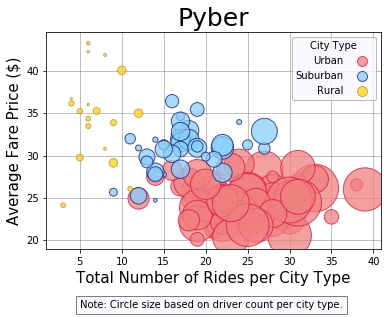

In [7]:
# Set up the grid lines
plt.figure(figsize=(20,3))
fig, ax = plt.subplots()

# Move grid lines under bubbles
ax.set_axisbelow(True)

# Format the grid lines
ax.grid(linestyle='-', linewidth='0.5', color='grey')

#          ----Urban Data----
# Select the Urban series from Merged DataFram using loc
urban = merged_df.loc[merged_df["type"]=="Urban"]

# Find the average Urban fare
urban_average_fare = urban.groupby(["city"]).mean()["fare"]

# Find the total Urban drivers
urban_total_drivers = urban.groupby(["city"]).sum()["driver_count"]

# Find the total Urban rides
urban_total_rides = urban.groupby(["city"]).count()["ride_id"]

# Format the scatter plot for Urban data
plt.scatter(urban_total_rides,
            urban_average_fare,
            s=urban_total_drivers,
            marker="o",
            c="lightcoral",
            edgecolor="crimson",
            label="Urban",
            alpha=0.75,
            linewidths=1
           )

#          ----Suburban Data----
# Select Suburban series from MergedData using loc
suburban = merged_df.loc[merged_df["type"]=="Suburban"]

# Find the average Suburban fare
suburban_average_fare = suburban.groupby(["city"]).mean()["fare"]

# Find the total Suburban drivers
suburban_total_drivers = suburban.groupby(["city"]).sum()["driver_count"]

# Find the total Suburban rides
suburban_total_rides = suburban.groupby(["city"]).count()["ride_id"]

# Format the scatter plot for Suburban data
plt.scatter(suburban_total_rides,
            suburban_average_fare,
            s=suburban_total_drivers,
            marker="o",
            c="lightskyblue",
            edgecolor="midnightblue",
            label="Suburban",
            alpha=0.75,
            linewidths=1
           )

#          ----Rural Data----
# Select the Rural series from the MergedData using loc
rural = merged_df.loc[merged_df["type"]=="Rural"]

# Find the average Rural fare
rural_average_fare = rural.groupby(["city"]).mean()["fare"]

# Find the total Rural drivers
rural_total_driver = rural.groupby(["city"]).sum()["driver_count"]

# Find the total Rural rides
rural_total_rides = rural.groupby(["city"]).count()["ride_id"]

# Format the scatter plot for Rural data
plt.scatter(rural_total_rides,
            rural_average_fare,
            s=rural_total_driver,
            marker="o",
            c="gold",
            edgecolor="peru",
            label="Rural",
            alpha=0.75,
            linewidths=1
            
           )

#Place the legend in the best location
legend = plt.legend(loc="best", 
           fontsize = 10,  
           markerfirst = False, 
           fancybox = True, 
           framealpha= .8,
           facecolor = "ghostwhite",
           edgecolor = "darkgrey",
           title= "City Type"
                   )

#legend = plt.legend(frameon = True, edgecolor = 'black')
legend.legendHandles[0]._sizes = [100]
legend.legendHandles[1]._sizes = [100]
legend.legendHandles[2]._sizes = [100]

# Set title and axis labels
#ax.set_facecolor('lightgreen')
plt.title("Pyber",fontsize=25)
plt.xlabel("Total Number of Rides per City Type",fontsize= 15)
plt.ylabel("Average Fare Price ($)",fontsize= 15)
plt.text(5, 
         12,
         "Note: Circle size based on driver count per city type.",
         bbox=dict(facecolor='ghostwhite', alpha=0.5)
        )

# Save image
plt.savefig("images/PyBer_bubble", bbox_inches = "tight", dpi = 100)

# Display the Bubble Chart
plt.show()

# Total Fares by City Type

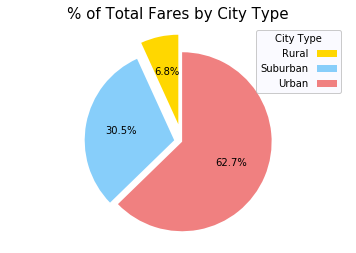

In [12]:
# Find the total fares by city type
city_fare_pie = merged_df.groupby(["type"])["fare"].sum()

# Set the index for the city types
city_fare_pie.index

# Set the colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Set the Urban slice out from the Suburban and Rural sections
explode = (0.2, .09, 0)

# Create the pie chart
plt.pie(city_fare_pie, 
        #labels = city_fare_pie.index, 
        autopct = "%1.1f%%",
        colors = colors, 
        explode = explode, 
        #shadow = True,
        startangle= 90
        )

# Make the pie chart a circle by setting the axis equal
plt.axis("equal")


# Add a title to the pie chart
plt.title("% of Total Fares by City Type",fontsize=15)

# Format Legend
plt.legend(loc="upper right", 
           fontsize = 10,  
           markerfirst = False, 
           fancybox = True, 
           framealpha= .6,
           facecolor = "ghostwhite",
           edgecolor = "darkgrey",
           title= "City Type",
           labels=("Rural","Suburban","Urban")
          )
# Save image
plt.savefig("images/PyBer_fares_pie", bbox_inches = "tight", dpi = 100)

# Display the pie chart
plt.show()

# Total Rides by City Type

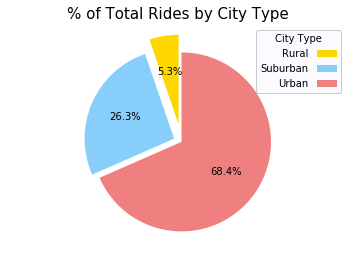

In [9]:
# Find how many rides were in each city type
city_ride_count = merged_df.groupby(["type"])["ride_id"].count()

# Set the index for the city types
city_ride_count.index

# Set colors for each each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]

# Set the Urban slice out from the Suburban and Rural sections 
explode = (0.2, .09, 0)

# Create the pie chart
plt.pie(city_ride_count,
        autopct = "%1.1f%%",
        colors = colors, 
        explode = explode, 
        #shadow = True,
        startangle= 90)

# Make the pie chart a circle by setting the axis equal
plt.axis("equal")

# Add a title to the pie chart
plt.title("% of Total Rides by City Type",fontsize=15)

# Format Legend
plt.legend(loc="upper right", 
           fontsize = 10,  
           markerfirst = False, 
           fancybox = True, 
           framealpha= .6,
           facecolor = "ghostwhite",
           edgecolor = "darkgrey",
           title= "City Type",
           labels=("Rural","Suburban","Urban")
          )

# Save image
plt.savefig("images/PyBer_rides_pie", bbox_inches = "tight", dpi = 100)

# Display the pie chart
plt.show()

# Total Drivers by City Type

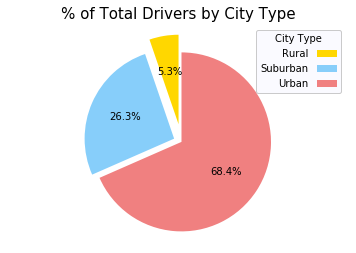

In [10]:
# Find the total drivers per city type
city_driver_count = merged_df.groupby(["type"])["driver_count"].count()

# Set the index for the city types
city_driver_count.index

# Set colors for each each section of the pie chart
colors = ["gold","lightskyblue","lightcoral"]

# Set the Urban slice out from the Suburban and Rural sections
explode = (0.2, .09, 0)

# Create the pie chart
plt.pie(city_driver_count,
        autopct = "%1.1f%%",
        colors = colors, 
        explode = explode, 
        #shadow = True,
        startangle= 90
       )

# Make the pie chart a circle by setting the axis equal
plt.axis("equal")

# Add a title to the pie chart
plt.title("% of Total Drivers by City Type", fontsize=15)

# Format Legend
plt.legend(loc="upper right", 
           fontsize = 10,  
           markerfirst = False, 
           fancybox = True, 
           framealpha= .6,
           facecolor = "ghostwhite",
           edgecolor = "darkgrey",
           title= "City Type",
           labels=("Rural","Suburban","Urban")
          )

# Save image
plt.savefig("images/PyBer_drivers_pie", bbox_inches = "tight", dpi = 100)

# Display the pie chart
plt.show()